# Insurance Claim Fraud Detection

**Problem Definition**

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

**Prediction**

In this example, we will be working with some auto insurance data to demonstrate how one can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [2]:
#Loading dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


As we can see that there are 1000 rows and 40 columns in the database 

**We can also see that the police report available column has some rows with "?" has to be treated** 

In [3]:
# to see the unique values of the dataset
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [4]:
# to show all columns
pd.set_option('display.max_columns', None)
df.sample(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
170,222,42,922565,23-05-1999,IL,250/500,500,1124.60,0,612904,MALE,Associate,armed-forces,hiking,not-in-family,0,0,30-01-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Arlington,4985 Sky Lane,23,3,YES,0,0,?,51740,11940,7960,31840,Jeep,Wrangler,2006,N,NaN
683,238,43,444035,11-05-1996,OH,250/500,1000,1524.45,4000000,607458,MALE,High School,handlers-cleaners,chess,wife,0,-44800,16-02-2015,Multi-vehicle Collision,Rear Collision,Total Loss,Ambulance,NC,Hillsdale,3397 5th Ave,21,4,NO,0,0,NO,42700,4270,4270,34160,Saab,92x,1995,Y,NaN
240,249,43,547802,03-09-2013,IL,250/500,1000,1518.46,0,606238,FEMALE,MD,armed-forces,cross-fit,own-child,0,0,26-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Fire,SC,Riverwood,2201 4th Lane,16,1,?,0,0,YES,53500,5350,5350,42800,Saab,92x,2015,N,NaN
448,27,32,327856,27-08-2014,OH,100/300,500,1008.38,0,472803,FEMALE,PhD,adm-clerical,yachting,other-relative,37900,0,01-02-2015,Single Vehicle Collision,Front Collision,Total Loss,Ambulance,SC,Arlington,4239 Weaver Ave,11,1,NO,1,0,?,61500,12300,6150,43050,Dodge,Neon,2013,N,NaN
43,106,30,790442,13-04-2003,OH,250/500,500,538.17,0,433782,FEMALE,PhD,transport-moving,reading,own-child,49700,-60200,10-02-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Arlington,6660 MLK Drive,23,1,NO,2,2,NO,51120,5680,5680,39760,Mercedes,E400,2005,N,NaN
885,254,45,633375,17-09-2003,IL,250/500,500,1083.64,0,614372,MALE,JD,other-service,paintball,husband,59800,0,27-02-2015,Multi-vehicle Collision,Rear Collision,Total Loss,Police,NC,Columbus,7630 Rock Drive,19,3,YES,0,0,?,79680,13280,13280,53120,BMW,3 Series,2004,N,NaN
357,110,28,435784,13-07-2013,OH,250/500,1000,1573.93,0,461919,MALE,College,other-service,movies,other-relative,30400,0,07-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NY,Springfield,9397 Francis St,20,3,YES,0,2,?,65040,10840,10840,43360,Suburu,Impreza,2010,N,NaN
693,134,36,469426,15-07-1990,OH,250/500,1000,1497.41,0,613842,MALE,PhD,machine-op-inspct,kayaking,husband,14100,-44500,25-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Ambulance,WV,Northbrook,7701 Tree St,17,3,NO,2,0,YES,77200,9650,9650,57900,Ford,Escape,1996,N,NaN
314,91,30,515217,18-06-2010,IL,250/500,2000,1316.63,8000000,613178,FEMALE,Masters,machine-op-inspct,golf,unmarried,43900,0,08-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Other,SC,Northbend,3495 Britain Drive,13,3,YES,2,0,?,84500,13000,13000,58500,BMW,X6,2009,N,NaN
96,325,47,900628,05-02-2006,IN,500/1000,1000,1690.27,0,438830,FEMALE,Associate,protective-serv,hiking,not-in-family,61500,0,14-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Fire,VA,Springfield,6550 Andromedia St,11,1,YES,0,3,NO,72930,6630,6630,59670,Dodge,RAM,2006,Y,NaN


In [5]:
# To check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**Observation**
1. As we can see that the 3 columns namely property damage, police report and collision type is having the question mark ("?"), so we have to clean the data and see for whether any other column is having the the same or not 
2. last column _c39 is having 100 % null values to be dropped from database.
3. all date columns to be dropped from database
4. policy no. to be dropped from database


In [6]:
# checkking for question mark in the data
question={}
for i in df.columns:
    if df[i].dtypes==object:
        j=np.sum(df[i]=="?")
        question[i]=j
question=pd.DataFrame.from_dict(question, orient='index')
print(question)        

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


**Observation**

Columns containing the question mark

1. Collision type =178 
2. property damage=360
3. police report=346


In [7]:
# Cheking the mode of this above columns
df['collision_type'].mode()

0    Rear Collision
Name: collision_type, dtype: object

In [8]:
df['property_damage'].mode()

0    ?
Name: property_damage, dtype: object

In [9]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [10]:
df['police_report_available'].mode()

0     ?
1    NO
Name: police_report_available, dtype: object

**Observations**

1. I am going to replace the Collision type =178 "?" values with its own column mode as rear collision
2. for property damage=360, question marks property damage can be replaced with not known as the no. of ? are only more than the other two values, hence replacing keeping that values like that only, can be treated as a third category in  it
3. for police report=346 we can see that question mark and no are in same no. hence I am selecting to put 'no status only in place of "?".

In [11]:
# Replacing the "?" mark by the mode of the column
df['collision_type']=df['collision_type'].replace("?", "Rear Collision")
df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [12]:
# Replacing the "?" mark by the mode of the column
df['property_damage']=df['property_damage'].replace("?", "Unknown")
df['property_damage'].unique()

array(['YES', 'Unknown', 'NO'], dtype=object)

In [13]:
# Replacing the "?" mark by the mode of the column
df['police_report_available']=df['police_report_available'].replace("?", "NO")
df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

# EDA

In [14]:
# Dropping the Columns which not adding any information into the model as per above observation
df=df.drop(['policy_number', 'policy_bind_date','incident_date','_c39','incident_location'],axis=1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,Unknown,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,Unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,Unknown,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,Unknown,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Count Plot for  policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
OH    0.352
IL    0.338
IN    0.310
Name: policy_state, dtype: float64


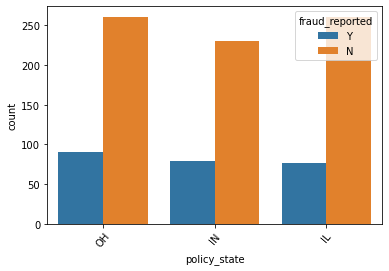

Count Plot for  policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
250/500     0.351
100/300     0.349
500/1000    0.300
Name: policy_csl, dtype: float64


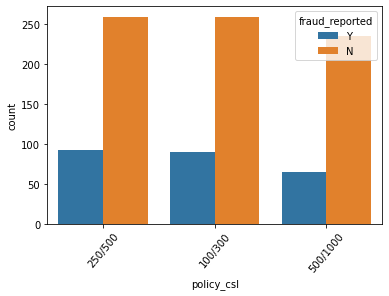

Count Plot for  insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
FEMALE    0.537
MALE      0.463
Name: insured_sex, dtype: float64


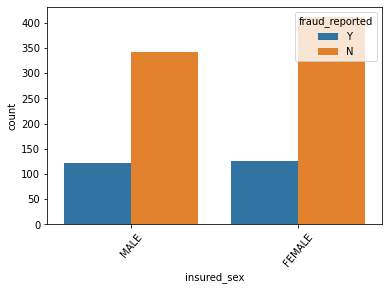

Count Plot for  insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
JD             0.161
High School    0.160
Associate      0.145
MD             0.144
Masters        0.143
PhD            0.125
College        0.122
Name: insured_education_level, dtype: float64


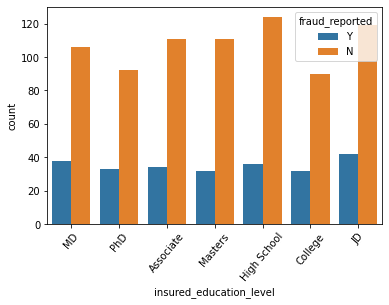

Count Plot for  insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
machine-op-inspct    0.093
prof-specialty       0.085
tech-support         0.078
sales                0.076
exec-managerial      0.076
craft-repair         0.074
transport-moving     0.072
other-service        0.071
priv-house-serv      0.071
armed-forces         0.069
adm-clerical         0.065
protective-serv      0.063
handlers-cleaners    0.054
farming-fishing      0.053
Name: insured_occupation, dtype: float64


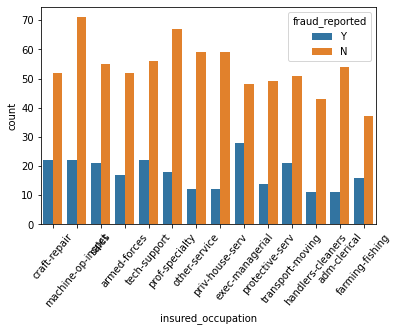

Count Plot for  insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
reading           0.064
exercise          0.057
paintball         0.057
bungie-jumping    0.056
movies            0.055
golf              0.055
camping           0.055
kayaking          0.054
yachting          0.053
hiking            0.052
video-games       0.050
skydiving         0.049
base-jumping      0.049
board-games       0.048
polo              0.047
chess             0.046
dancing           0.043
sleeping          0.041
cross-fit         0.035
basketball        0.034
Name: insured_hobbies, dtype: fl

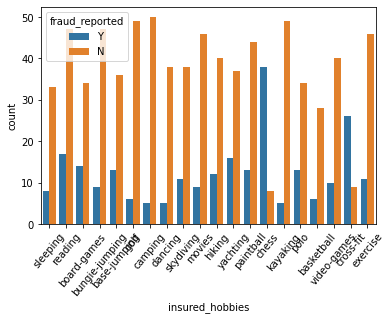

Count Plot for  insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
own-child         0.183
other-relative    0.177
not-in-family     0.174
husband           0.170
wife              0.155
unmarried         0.141
Name: insured_relationship, dtype: float64


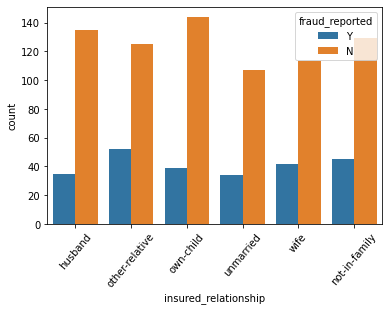

Count Plot for  incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
Multi-vehicle Collision     0.419
Single Vehicle Collision    0.403
Vehicle Theft               0.094
Parked Car                  0.084
Name: incident_type, dtype: float64


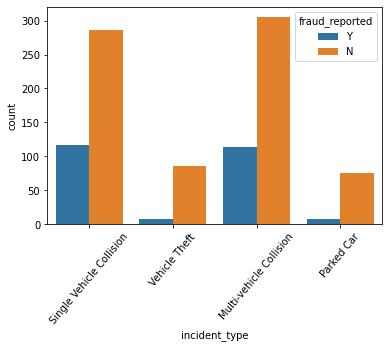

Count Plot for  collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
Rear Collision     0.470
Side Collision     0.276
Front Collision    0.254
Name: collision_type, dtype: float64


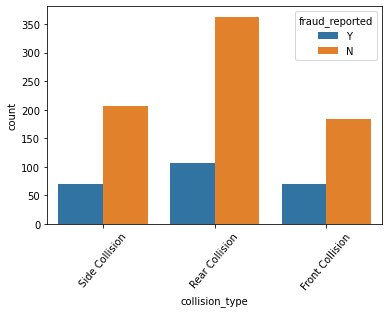

Count Plot for  incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
Minor Damage      0.354
Total Loss        0.280
Major Damage      0.276
Trivial Damage    0.090
Name: incident_severity, dtype: float64


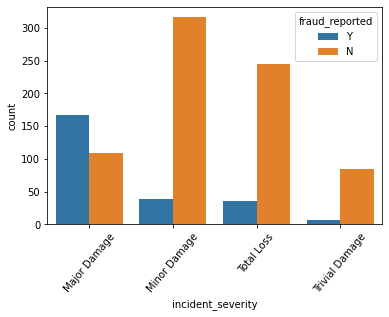

Count Plot for  authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
Police       0.292
Fire         0.223
Other        0.198
Ambulance    0.196
None         0.091
Name: authorities_contacted, dtype: float64


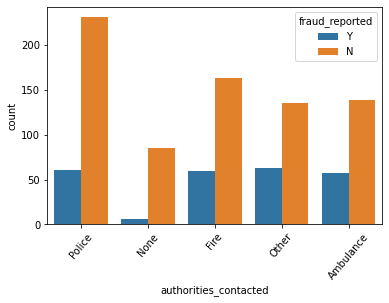

Count Plot for  incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
NY    0.262
SC    0.248
WV    0.217
VA    0.110
NC    0.110
PA    0.030
OH    0.023
Name: incident_state, dtype: float64


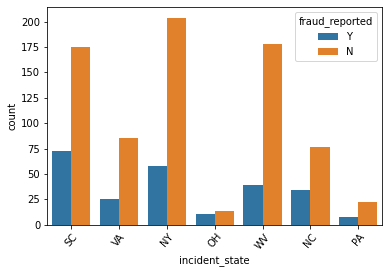

Count Plot for  incident_city
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64
Springfield    0.157
Arlington      0.152
Columbus       0.149
Northbend      0.145
Hillsdale      0.141
Riverwood      0.134
Northbrook     0.122
Name: incident_city, dtype: float64


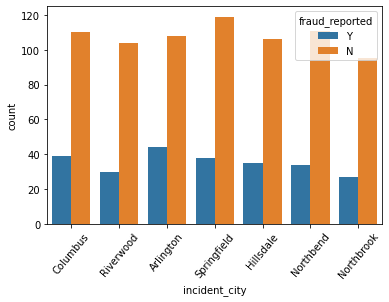

Count Plot for  property_damage
Unknown    360
NO         338
YES        302
Name: property_damage, dtype: int64
Unknown    0.360
NO         0.338
YES        0.302
Name: property_damage, dtype: float64


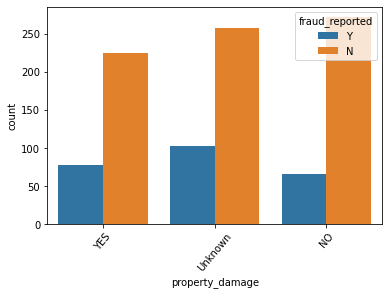

Count Plot for  police_report_available
NO     686
YES    314
Name: police_report_available, dtype: int64
NO     0.686
YES    0.314
Name: police_report_available, dtype: float64


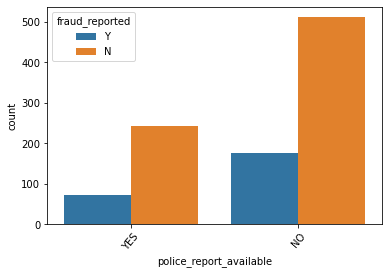

Count Plot for  auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64
Saab          0.080
Dodge         0.080
Suburu        0.080
Nissan        0.078
Chevrolet     0.076
Ford          0.072
BMW           0.072
Toyota        0.070
Audi          0.069
Accura        0.068
Volkswagen    0.068
Jeep          0.067
Mercedes      0.065
Honda         0.055
Name: auto_make, dtype: float64


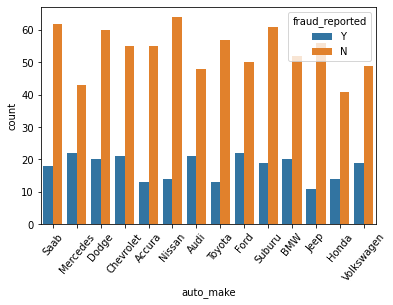

Count Plot for  auto_model
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64
RAM               0.043
Wrangler          0.042
A3                0.037
Neon              0.037
MDX               0.036
Jet

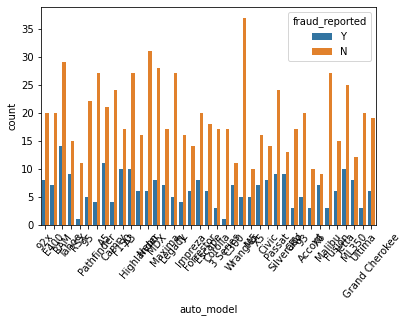

Count Plot for  fraud_reported
N    753
Y    247
Name: fraud_reported, dtype: int64
N    0.753
Y    0.247
Name: fraud_reported, dtype: float64


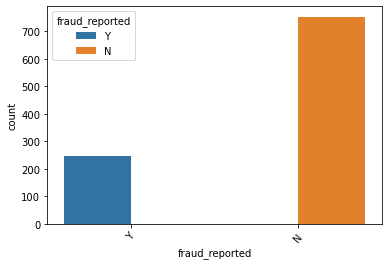

In [15]:
# Creating Count plot for the Categorical data base
for i in df.columns:
    if df[i].dtypes=='object':
        print('Count Plot for ', i)
        sns.countplot(x=df[i], hue=df['fraud_reported'])
        plt.xticks(rotation=50)
        print(df[i].value_counts())
        print(df[i].value_counts(normalize=True))
        plt.show()

**Observations**
1. 35% policy holders are from Ohio state, 33% are from Illinois and 31% are from Indiana
2. Combined single limit is 35% is with 250/500and 100/300 , 30% is with 500/1000
3. there are 54% males are there and 46% females are insured
4. the education level for the insureds are above high school but the percentage of the fraud cases is nearly same in all the categories
5. It is seen that the protective services has higher fraudelunts cases and highest count in this category belongs to machine operator inspector
6. Hobbies with reading has got highest no. in this category and kayaking has got highest fraudelunt cases seen 
7. In relationship status: own child has 18% share in this category followed by the other relative not in family and husband
8. Incident type has 42% multi vehical collision, 40%single vehical collision and vehical theftand parked at nearly same value
9. 47% rear collision type is there(data replced), 27% side collision and 25% front collision
10. the severity of the collision is 35% minor, 28% total loss, 28% major loss, 9% trivial damage from which major damage has got fraudelunt cases more
11. from new york the cases are more but fraudelunt cases are more from south carolina
12. The incident cities do not have that much variation
13. In property damage highest no. is unknown, 34% are no and 30% is yes
14. Police report available is 69% are not reported
15. In Auto make the distribution of every make is nearly same
16. Ram Auto model is having 43% share in this category
17. **24.7% are the frauds observed and 75.3% not fraud cases seen**

Hist Plot for  months_as_customer


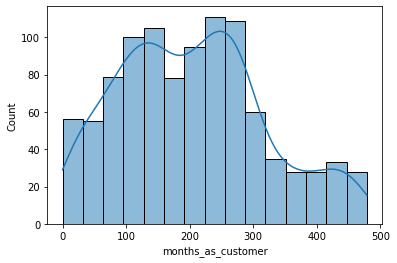

Hist Plot for  age


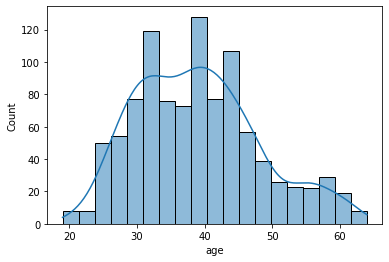

Hist Plot for  policy_deductable


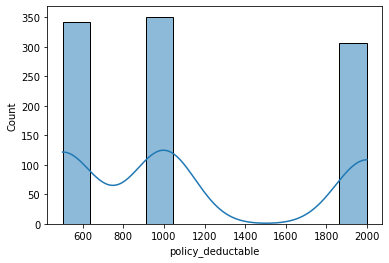

Hist Plot for  policy_annual_premium


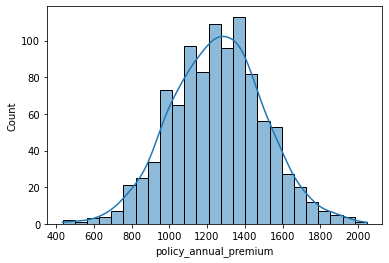

Hist Plot for  umbrella_limit


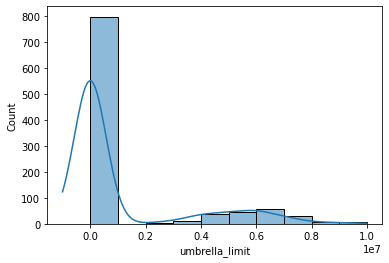

Hist Plot for  insured_zip


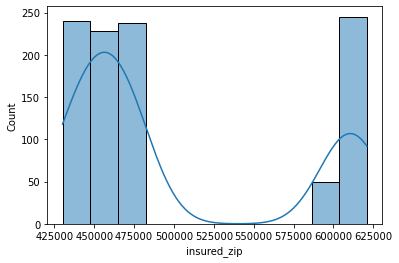

Hist Plot for  capital-gains


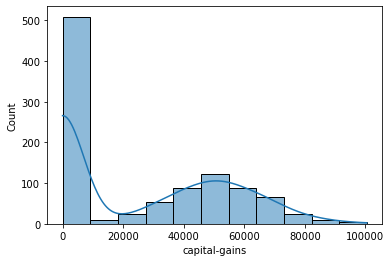

Hist Plot for  capital-loss


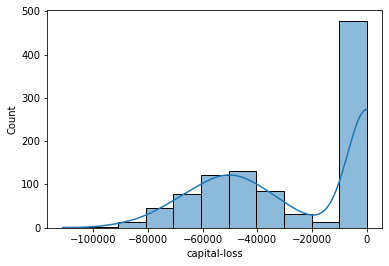

Hist Plot for  incident_hour_of_the_day


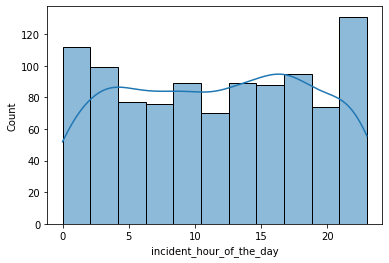

Hist Plot for  number_of_vehicles_involved


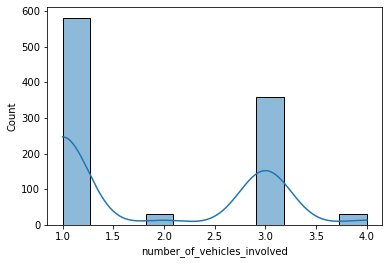

Hist Plot for  bodily_injuries


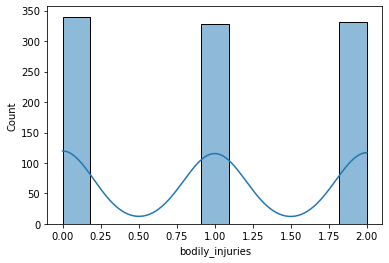

Hist Plot for  witnesses


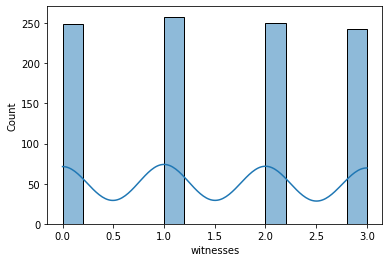

Hist Plot for  total_claim_amount


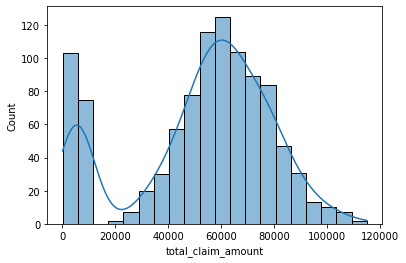

Hist Plot for  injury_claim


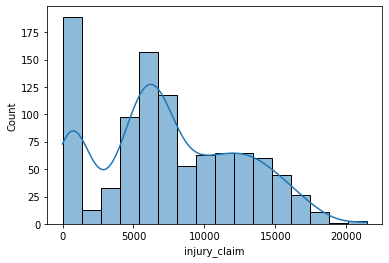

Hist Plot for  property_claim


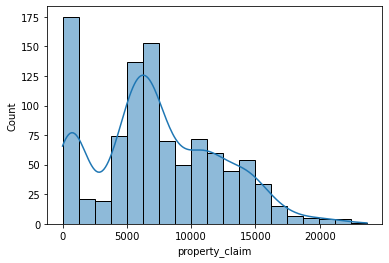

Hist Plot for  vehicle_claim


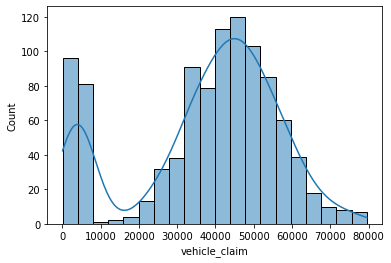

Hist Plot for  auto_year


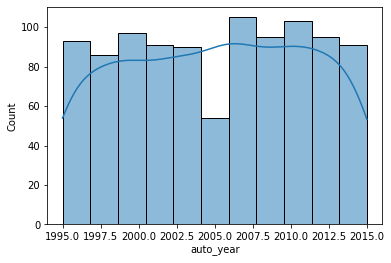

In [16]:
#Ploting histist plot for the Numerical columns
for i in df.columns:
    if df[i].dtypes!='object':
        print('Hist Plot for ', i)
        sns.histplot(x=df[i],kde=True)
        plt.show()

**Observation**
1. months as customer showing some positive skewness
2. age is also positively skewed.
3. policy deductable can be treated as a categorical column with numeric value
4. policy annual premium is also near normal distribution
5. umbrella_limit has long right tail, positively skewed
6. Insured zip also positively skewed
7. capital gain is positively skewed and capital is negatively skewed
8. incident_hour_of_the_day  is near normal distributon
9. number_of_vehicles_involved can be treated as a numeric categorical hence not to worry for the skewness
10. bodily_injuries can be treated as a numeric categorical hence not to worry for the skewness
11. witnesses can be treated as a numeric categorical hence not to worry for the skewness
12. total claim amount is negatively skewed
13. injury claim and prpoerty claim is positively skewed
14. vehicle claim is negatively skewed
15. auto year is near normal distribution


In [17]:
# Checking the skewness of dataset
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

**Observation**

1. As we can see that multiple columns are having skewness but we will treat for the skewness to only the columns not having skewness between -0.5 to 0.5.

2. As per this the skewness to be treated for following columns
a. umbrella_limit                 1.806712
b. insured_zip                    0.816554
c. total_claim_amount            -0.594582
d. vehicle_claim                 -0.621098



<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

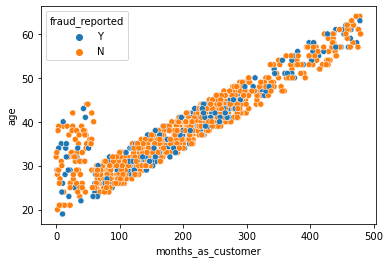

In [18]:
#scatter plot for months as customer and age 
sns.scatterplot(x="months_as_customer", y="age", hue="fraud_reported", data=df)

As we can see that the age and the months as customer is showing same trend because the as the customer age increases the months as customer also increasing.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

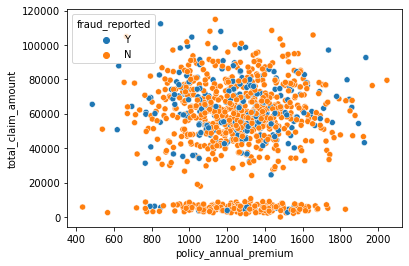

In [19]:
#scatter plot for annual premium and total claim
sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", hue="fraud_reported", data=df)

As we can see that thefraudelunt cases are there in every total claim amount and are dense in bet 40000 and 100000

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

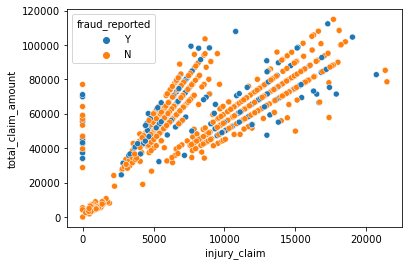

In [20]:
#scatter plot for injury and total claim 
sns.scatterplot(x="injury_claim", y="total_claim_amount", hue="fraud_reported", data=df)

there is high correlation between these two factors they one increases the other is also increasing

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

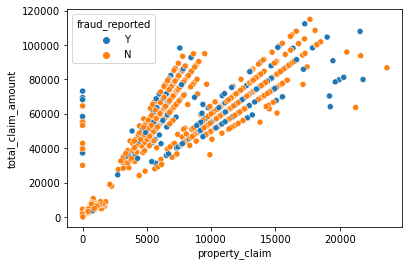

In [21]:
#scatter plot for property and total claim
sns.scatterplot(x="property_claim", y="total_claim_amount", hue="fraud_reported", data=df)

there is high correlation between these two factors they one increases the other is also increasing

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

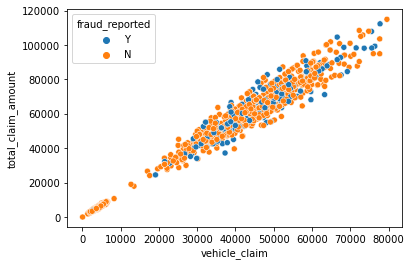

In [22]:
#scatter plot for vehicle and total claim 
sns.scatterplot(x="vehicle_claim", y="total_claim_amount", hue="fraud_reported", data=df)

there is high correlation between these two factors they one increases the other is also increasing

**removing skewness from the a. umbrella_limit 1.806712 b. insured_zip 0.816554 c. total_claim_amount -0.594582 d. vehicle_claim -0.621098 data by BOXCOX**

In [23]:
#removing the skewness 
from scipy.stats import boxcox
df['insured_zip']=boxcox(df['insured_zip'])[0]
df['total_claim_amount']=boxcox(df['total_claim_amount'])[0]
df['vehicle_claim']=boxcox(df['vehicle_claim'])[0]
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.000000
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.510411
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.522799
auto_year                     -0.048289
dtype: float64

As we can see that skewness is now in the acceptable limit and except for the umbrella_limit column if we see carefully it is more like categorical column

In [24]:
# Checking the umbrella limit 
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [25]:
#Checking for White spaces
df.loc[df['umbrella_limit']==-1000000]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,OH,100/300,500,1338.54,-1000000,0.177184,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,13,1,YES,0,1,NO,202841.049942,8560,17120,166243.338899,Chevrolet,Malibu,1996,N


<AxesSubplot:>

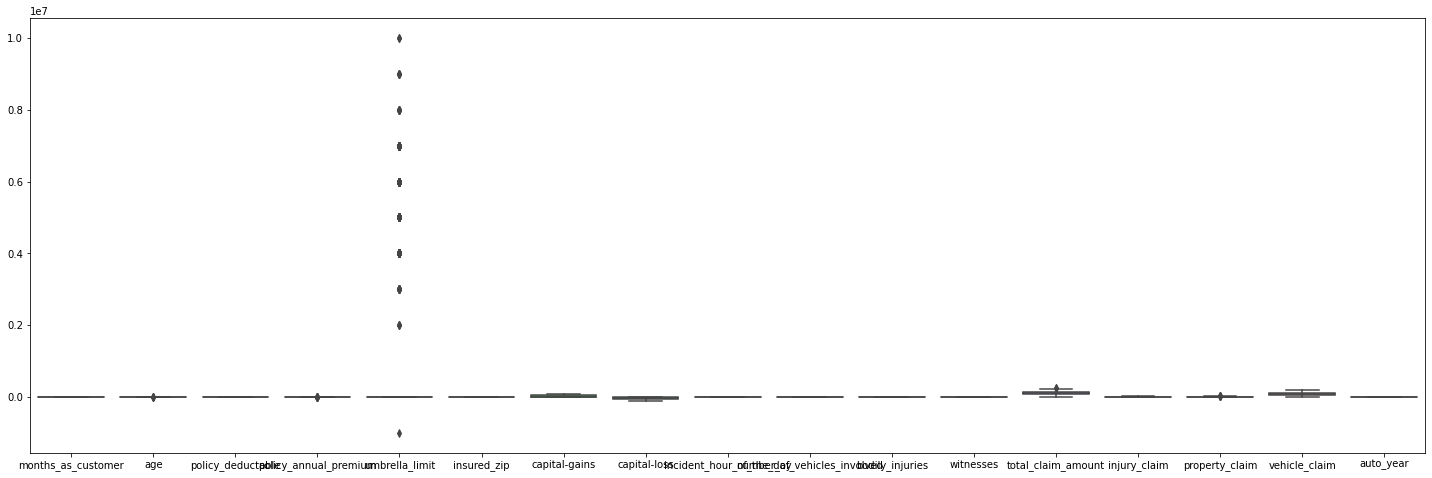

In [26]:
# Box plot to see the outliers
plt.figure(figsize=(25,8))
sns.boxplot(data=df)

As we can see the umbrella limit is having the outliers can be treated in preprocessing steps

**Correlation Matrix**

In [27]:
#Correlation between the factors
corr_mat=df.corr()
corr_mat

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,NaN,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062495,0.065329,0.034940,0.061307,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,NaN,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.070386,0.075522,0.060898,0.062764,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,NaN,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.023350,0.039107,0.064792,0.004875,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,NaN,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.008401,-0.017633,-0.011654,0.020028,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,NaN,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040182,-0.045412,-0.023790,-0.038275,0.009893
insured_zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,NaN,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015210,0.025934,-0.000779,0.014892,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,NaN,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036694,-0.046060,-0.022863,-0.033302,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,NaN,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.214321,0.165768,0.179536,0.211369,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,NaN,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.267336,0.224650,0.219084,0.260800,0.034554


<AxesSubplot:>

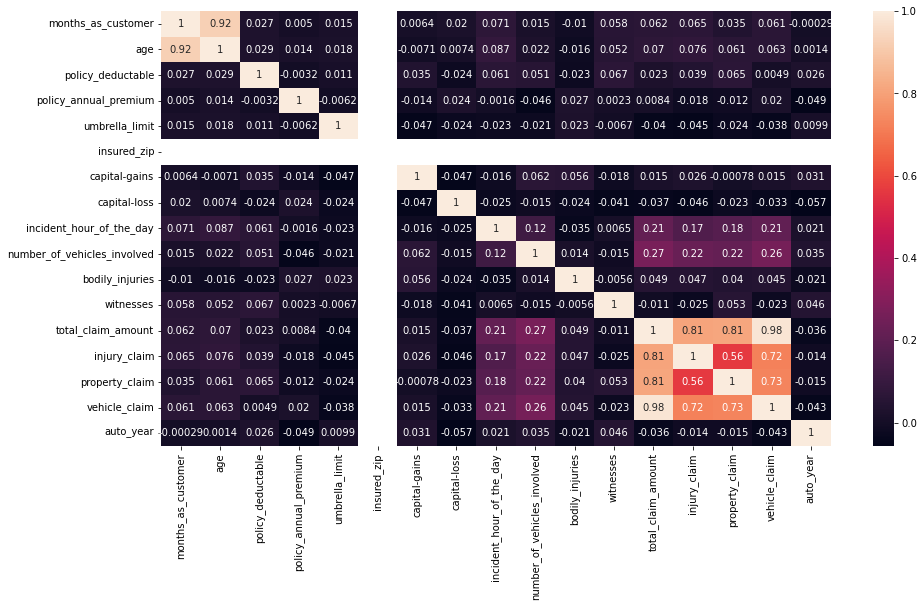

In [28]:
# Plotting heat map for correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat,annot=True)

**Observations**
1. we can see that the months as customer and age is very highly correlated with each other, hence we have to drop one of them column
2. total claim amountis the sum of injury, propert and vehicle claim we can delet either of them. as they all are showing the hign multicollinearity


<AxesSubplot:>

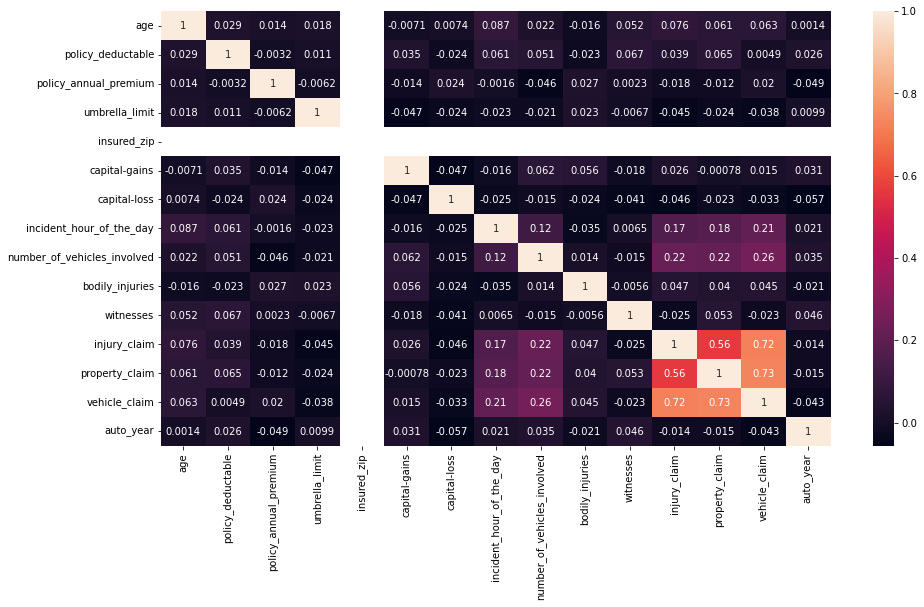

In [29]:
#Lets check the cmulticollinearity by dropping above parameters
df1=df.drop(['months_as_customer','total_claim_amount'],axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)

As we can see that multicollinearity is removed and the remaining can be checkedfor VIF score later on

**Encoding the Categorical column**

In [31]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i])
        
df1

,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,2,1,1000,1406.91,0,0.177184,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,2,1,2,1,6510,13020,123449.040291,10,1,2004,1
1,42,1,1,2000,1197.22,5000000,0.177184,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,1,0,0,0,780,780,6576.093798,8,12,2007,1
2,29,2,0,2000,1413.14,5000000,0.177184,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,7700,3850,51009.470790,4,30,2007,0
3,41,0,1,2000,1415.74,6000000,0.177184,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,1,1,2,0,6340,6340,119948.342559,3,34,2014,1
4,44,0,2,1000,1583.91,6000000,0.177184,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,1300,650,8719.884580,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2,2,1000,1310.80,0,0.177184,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,2,0,1,0,17440,8720,146703.688851,6,6,2006,0
996,41,0,0,1000,1436.79,0,0.177184,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,2,2,3,0,18080,18080,176402.335291,13,28,2015,0
997,34,2,1,500,1383.49,3000000,0.177184,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,1,2,3,1,7500,7500,124531.759267,11,19,1996,0
998,62,0,2,2000,1356.92,5000000,0.177184,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,1,0,1,1,5220,5220,83978.735124,1,5,1998,0


**Modelling**

 Outlier detection and removal

In [32]:
df=df1

In [33]:
# importing the zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(1000, 33)

In [34]:
# Setting threshold at 3 and detecting the outliers
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 27,  5,  5,  5,  4, 13,
        5,  5,  5], dtype=int64))


In [35]:
# Removing the outlier 
df3=df[(z<3).all(axis=1)]
df3.shape

(0, 33)

Note:- I have tried detecting and removing the outliers by using zscore taking the threshold at 3 and 5 but the their is huge loss of data is seen hence proceeding further, this outlier may have information.

In [36]:
#separating the dat set into input variables and output variable
X=df.drop(['fraud_reported'],axis=1)
Y=df['fraud_reported']
print(X.shape)
print(Y.shape)

(1000, 32)
(1000,)


In [37]:
# Normalizing thedataset
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[ 0.99083647,  1.18717314,  0.06093665, ...,  0.85646614,
        -1.64574255, -0.1834404 ],
       [ 0.33407345, -0.01685641,  0.06093665, ...,  0.36053902,
        -0.65747047,  0.31549088],
       [-1.08891308,  1.18717314, -1.18266843, ..., -0.63131523,
         0.95970204,  0.31549088],
       ...,
       [-0.54161057,  1.18717314,  0.06093665, ...,  1.1044297 ,
        -0.02857005, -1.5139238 ],
       [ 2.52328351, -1.22088596,  1.30454172, ..., -1.37520591,
        -1.28637088, -1.18130295],
       [ 2.3043625 ,  1.18717314,  0.06093665, ...,  0.36053902,
        -0.65747047,  0.31549088]])

In [38]:
# Checking the VIF score of the variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df=pd.DataFrame(X)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df1 = new_df
vif_scores(df1)

,Independent Features,VIF Scores
0,0,1.045524
1,1,1.031965
2,2,1.025351
3,3,1.035503
4,4,1.028171
5,5,1.030483
6,6,1.000000
7,7,1.023503
8,8,1.040374
9,9,1.015086


As we can see that the vif score is less than 5 hence proceeding further

**Balancing the dataset**

In [39]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [40]:
# Importing Libraries for it 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [41]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg=LogisticRegression()

In [42]:
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random State  1
testing accuracy 0.7185430463576159 randon state 1
Training Accuracy 0.7632890365448505 random state 1
max accuracy 0.7185430463576159 max_random_state 1
At Random State  2
testing accuracy 0.7284768211920529 randon state 2
Training Accuracy 0.7674418604651163 random state 2
max accuracy 0.7284768211920529 max_random_state 2
At Random State  3
testing accuracy 0.7781456953642384 randon state 3
Training Accuracy 0.7458471760797342 random state 3
max accuracy 0.7781456953642384 max_random_state 3
At Random State  4
testing accuracy 0.7350993377483444 randon state 4
Training Accuracy 0.7624584717607974 random state 4
At Random State  5
testing accuracy 0.7582781456953642 randon state 5
Training Accuracy 0.7549833887043189 random state 5
At Random State  6
testing accuracy 0.7483443708609272 randon state 6
Training Accuracy 0.7591362126245847 random state 6
At Random State  7
testing accuracy 0.7516556291390728 randon state 7
Training Accuracy 0.7574750830564784 random s

testing accuracy 0.7185430463576159 randon state 72
Training Accuracy 0.7641196013289037 random state 72
At Random State  73
testing accuracy 0.7251655629139073 randon state 73
Training Accuracy 0.7599667774086378 random state 73
At Random State  74
testing accuracy 0.7615894039735099 randon state 74
Training Accuracy 0.7508305647840532 random state 74
At Random State  75
testing accuracy 0.7384105960264901 randon state 75
Training Accuracy 0.7558139534883721 random state 75
At Random State  76
testing accuracy 0.7251655629139073 randon state 76
Training Accuracy 0.7649501661129569 random state 76
At Random State  77
testing accuracy 0.7450331125827815 randon state 77
Training Accuracy 0.7641196013289037 random state 77
At Random State  78
testing accuracy 0.7582781456953642 randon state 78
Training Accuracy 0.7549833887043189 random state 78
At Random State  79
testing accuracy 0.7152317880794702 randon state 79
Training Accuracy 0.7641196013289037 random state 79
At Random State  80


In [44]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', maxrs)

max accuracy 0.8013245033112583 max_random_state 69


In [46]:
# train test split for the data with suggested random state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=69)

In [47]:
# Checking score again for the the lr model 
lg=LogisticRegression()
lg.fit(X_train,Y_train)
predlg=lg.predict(X_test)
predtrain=lg.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predlg))
print(confusion_matrix(Y_test,predlg))
print(classification_report(Y_test,predlg))

Training accuracy is  0.75
0.8013245033112583
[[117  40]
 [ 20 125]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       157
           1       0.76      0.86      0.81       145

    accuracy                           0.80       302
   macro avg       0.81      0.80      0.80       302
weighted avg       0.81      0.80      0.80       302



In [48]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

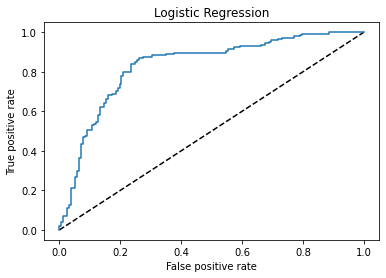

0.8036459477267736

In [49]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

In [50]:
# using DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
predtrain=dtc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Training accuracy is  1.0
0.8543046357615894
[[134  23]
 [ 21 124]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       157
           1       0.84      0.86      0.85       145

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



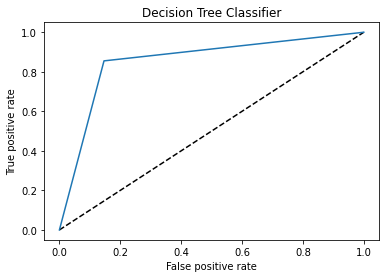

0.8543377992532396

In [51]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

In [52]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
predtrain=rf.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Training accuracy is  1.0
0.9039735099337748
[[140  17]
 [ 12 133]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       157
           1       0.89      0.92      0.90       145

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



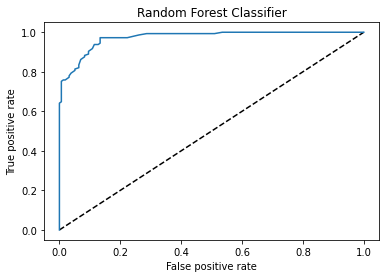

0.9044805622666373

In [53]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

In [54]:
# Using SVC
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
predtrain=svc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

Training accuracy is  0.9584717607973422
0.8774834437086093
[[133  24]
 [ 13 132]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       157
           1       0.85      0.91      0.88       145

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



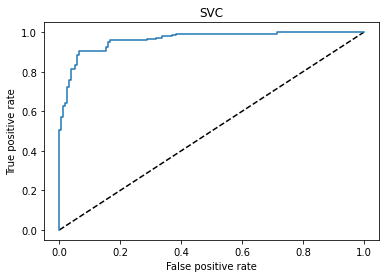

0.8787392927739952

In [55]:
#AUC ROC curve for  SVC
Y_pred_prob=svc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

auc_score=roc_auc_score(Y_test,svc.predict(X_test))

auc_score

In [56]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

Training accuracy is  0.7358803986710963
0.6688741721854304
[[ 61  96]
 [  4 141]]
              precision    recall  f1-score   support

           0       0.94      0.39      0.55       157
           1       0.59      0.97      0.74       145

    accuracy                           0.67       302
   macro avg       0.77      0.68      0.64       302
weighted avg       0.77      0.67      0.64       302



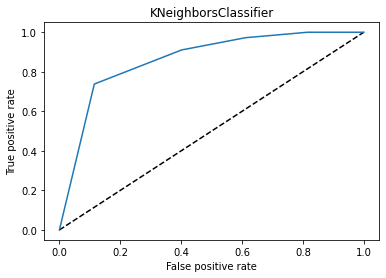

0.6804744124752911

In [57]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

In [58]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
predxgb=xgb.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predxgb))
print(confusion_matrix(Y_test,predxgb))
print(classification_report(Y_test,predxgb))

Training accuracy is  0.7358803986710963
0.8940397350993378
[[138  19]
 [ 13 132]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       157
           1       0.87      0.91      0.89       145

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



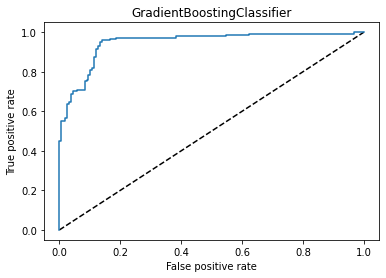

0.8946628596529761

In [59]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,xgb.predict(X_test))

auc_score

In [60]:
# using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
predada=ada.predict(X_test)
predtrain=ada.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predada))
print(confusion_matrix(Y_test,predada))
print(classification_report(Y_test,predada))

Training accuracy is  0.8928571428571429
0.8807947019867549
[[138  19]
 [ 17 128]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       157
           1       0.87      0.88      0.88       145

    accuracy                           0.88       302
   macro avg       0.88      0.88      0.88       302
weighted avg       0.88      0.88      0.88       302



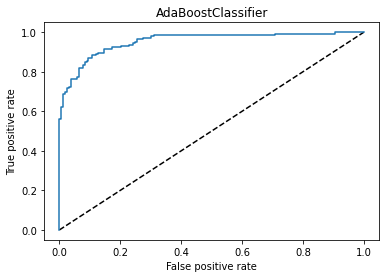

0.8808697562047002

In [61]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

In [62]:
# Using Naive bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
predtrain=gnb.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predgnb))
print(confusion_matrix(Y_test,predgnb))
print(classification_report(Y_test,predgnb))

Training accuracy is  0.7491694352159468
0.7615894039735099
[[106  51]
 [ 21 124]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       157
           1       0.71      0.86      0.78       145

    accuracy                           0.76       302
   macro avg       0.77      0.77      0.76       302
weighted avg       0.77      0.76      0.76       302



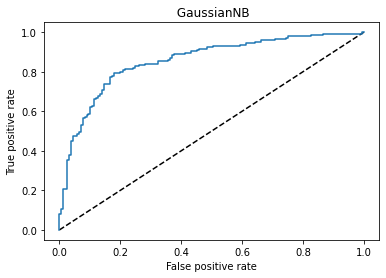

0.7651658247309466

In [63]:
#AUC ROC curve for  GaussianNB
Y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' GaussianNB')
plt.show()

auc_score=roc_auc_score(Y_test,gnb.predict(X_test))

auc_score

In [64]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,knn,xgb,ada,gnb,svc]

for i in model:
    for j in range(2,11):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())


taking cv = 2
Cross validation score for  LogisticRegression()  is [0.73705179 0.74767596]
Mean of Cross Val. score is  0.7423638778220452
taking cv = 3
Cross validation score for  LogisticRegression()  is [0.74103586 0.7310757  0.75498008]
Mean of Cross Val. score is  0.742363877822045
taking cv = 4
Cross validation score for  LogisticRegression()  is [0.71883289 0.75862069 0.71276596 0.76861702]
Mean of Cross Val. score is  0.7397091399063151
taking cv = 5
Cross validation score for  LogisticRegression()  is [0.74172185 0.75083056 0.71428571 0.73421927 0.76744186]
Mean of Cross Val. score is  0.7416998525885019
taking cv = 6
Cross validation score for  LogisticRegression()  is [0.74501992 0.74103586 0.74900398 0.72908367 0.74900398 0.76494024]
Mean of Cross Val. score is  0.7463479415670652
taking cv = 7
Cross validation score for  LogisticRegression()  is [0.73611111 0.72093023 0.77209302 0.72093023 0.69302326 0.78604651
 0.7627907 ]
Mean of Cross Val. score is  0.7417035806570691
t

Cross validation score for  AdaBoostClassifier()  is [0.71713147 0.89110226]
Mean of Cross Val. score is  0.8041168658698539
taking cv = 3
Cross validation score for  AdaBoostClassifier()  is [0.5876494  0.88844622 0.89442231]
Mean of Cross Val. score is  0.7901726427622843
taking cv = 4
Cross validation score for  AdaBoostClassifier()  is [0.64456233 0.85941645 0.91223404 0.93351064]
Mean of Cross Val. score is  0.8374308651729782
taking cv = 5
Cross validation score for  AdaBoostClassifier()  is [0.67880795 0.7807309  0.92026578 0.910299   0.93687708]
Mean of Cross Val. score is  0.8453961408989901
taking cv = 6
Cross validation score for  AdaBoostClassifier()  is [0.70119522 0.68525896 0.91633466 0.91633466 0.91633466 0.94820717]
Mean of Cross Val. score is  0.8472775564409031
taking cv = 7
Cross validation score for  AdaBoostClassifier()  is [0.71296296 0.69767442 0.86046512 0.93488372 0.90232558 0.93488372
 0.93953488]
Mean of Cross Val. score is  0.8546757721176325
taking cv = 8


**Observation and Model selection on the basis of above results**

1. We can see that the Random Forest Classifier is giving accuracy of 90% higher than the rest of the Classifiers.
2. If consider the cross val score of all the classifiers at fold 10 the Random Forest Classifier is giving the score of 88%
3. Hence I am selecting the Random Forest Classifier for the given prediction

**Hyper parameter Tunning**

In [73]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to be passed in GridSearchCV
parameters = {
    'n_estimators':[300,400],
    'max_features':['auto','log2'],
    'max_depth':[50,60]
 
} 

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=16,
                scoring='accuracy')


In [74]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=16, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [300, 400]},
             scoring='accuracy')

In [75]:
GCV.best_params_

{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 400}

In [77]:
# Checking score with best parameter
final_model=RandomForestClassifier(max_depth=50,max_features='auto',n_estimators=500)
final_model.fit(X_train,Y_train)
predfinal=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,predfinal))

Final Accuracy is with Random Forest Classifier =  0.9039735099337748


<function matplotlib.pyplot.show(close=None, block=None)>

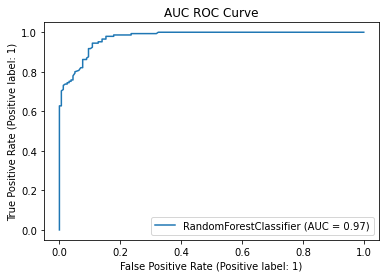

In [78]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

**Finalizing Models**

In [79]:
# Saving the Model
import joblib
joblib.dump(GCV.best_estimator_, "Insurance claim fraud prediction.pkl")

['Insurance claim fraud prediction.pkl']

In [80]:
# Conclusion
a=np.array(Y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,0,1
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
297,0,1
298,1,1
299,1,1
300,0,0


**END**